# Show controlled experimental setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import
import math
import matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh, pinvh
import rates

from rates.targets import HalfmoonFourClass, halfmoon_prob
from rates.auxillary import generate_Y, zero_one_loss
from rates.datasets import halfmoon, noise_augmentations
from rates.architectures import exp_kernel

# Config
np.random.seed(0)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble= r'\usepackage{mathtools,amsfonts}')
plt.rc('font', size=10, family='serif', serif='cm')

Show setup

In [3]:
num = 500
X, Y = np.meshgrid(np.linspace(-1.5, 1.5, num=num), np.linspace(-1.5, 2.5, num=num))
x_display = np.vstack((X.flatten(), Y.flatten())).T
p_display = halfmoon_prob(x_display)

np.random.seed(0)
x_test  = halfmoon(100)
y_test = generate_Y(halfmoon_prob(x_test))

In [4]:
viridis = cm.get_cmap('viridis', 4)
newcolors = viridis(np.linspace(0, 1, 4))
c0 = np.array([31/256, 119/256, 180/256, 1])
c1 = np.array([255/256, 127/256, 14/256, 1])
c2 = np.array([44/256, 160/256, 44/256, 1])
c3 = np.array([214/256, 39/256, 40/256, 1])

newcolors[0, :] = c0
newcolors[1, :] = c1
newcolors[2, :] = c2
newcolors[3, :] = c3
newcmp = ListedColormap(newcolors)

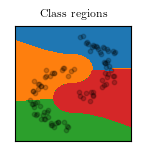

In [5]:
figsize=(1.5, 1.5)
tmp = p_display.argmax(axis=1)
fig, ax = plt.subplots(figsize=figsize)
ax.contourf(X, Y, tmp.reshape(*X.shape), cmap=newcmp)
ax.scatter(x_test[:, 0], x_test[:, 1], alpha=.2, s=10, c='k')
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
# fig.frameon = False
ax.set_title('Class regions', fontsize=8)
# ax.spines['right'].set_visible(False)
fig.savefig('setup_cl.pdf', bbox_inches='tight')

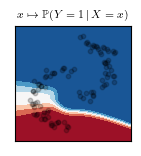

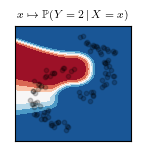

In [6]:
fig, ax = plt.subplots(figsize=figsize)
ax.contourf(X, Y, p_display[:, 2].reshape(*X.shape), cmap='RdBu_r')
ax.scatter(x_test[:, 0], x_test[:, 1], alpha=.2, s=10, c='k')
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
# ax.spines['right'].set_visible(False)
ax.set_title(r'$x\mapsto \mathbb{P} (Y=1\,|\, X=x)$', fontsize=8)
fig.savefig('pp_cl1.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=figsize)
ax.contourf(X, Y, p_display[:, 1].reshape(*X.shape), cmap='RdBu_r')
ax.scatter(x_test[:, 0], x_test[:, 1], alpha=.2, s=10, c='k')
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'$x\mapsto \mathbb{P} (Y=2\,|\, X=x)$', fontsize=8)
# ax.spines['right'].set_visible(False)
fig.savefig('pp_cl2.pdf', bbox_inches='tight')

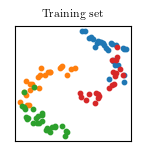

In [7]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=figsize)
for i in range(4):
    ind = y_test.argmax(axis=1) == i
    ax.scatter(x_test[ind, 0], x_test[ind, 1], s=10, alpha=1)
ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
ax.set_xticks([])
ax.set_yticks([])
# ax.spines['right'].set_visible(False)
ax.set_title(r'Training set', fontsize=8)
fig.savefig('training.pdf', bbox_inches='tight')

In [8]:
np.random.seed(0)
n_up = nu_max = 2000
sigma = .2
lambd = 1e-3

xi = noise_augmentations(halfmoon(nu_max))
K_up = exp_kernel(xi, xi, sigma=sigma)
T = np.kron(np.eye(nu_max), np.ones((2,2)))

K_inv = pinvh(K_up, atol=1e-5 / n_up)
T_l = T - lambd * K_inv
w, v = eigh(T_l, subset_by_index=[len(T_l) - 5, len(T_l) - 1])

K_display = exp_kernel(x_display, xi, sigma=sigma)
phi_display = K_display @ (K_inv @ v)

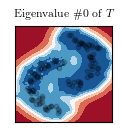

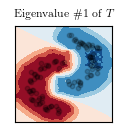

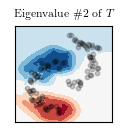

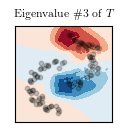

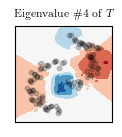

In [9]:
figsize=(1.25, 1.25)
for i in range(5):
    fig, ax = plt.subplots(figsize=figsize)
    ax.contourf(X, Y, phi_display[:, -i-1].reshape(*X.shape), cmap='RdBu_r')
    ax.scatter(x_test[:, 0], x_test[:, 1], alpha=.2, s=10, c='k')
    ax.tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(r'Eigenvalue \#' + str(i) + r' of $T$', fontsize=8)
    # ax.spines['right'].set_visible(False)
    fig.savefig('eig_' + str(i) + '.pdf', bbox_inches='tight')